<a href="https://colab.research.google.com/github/sidhu2690/ChebyshevKAN/blob/main/Chebyshev_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

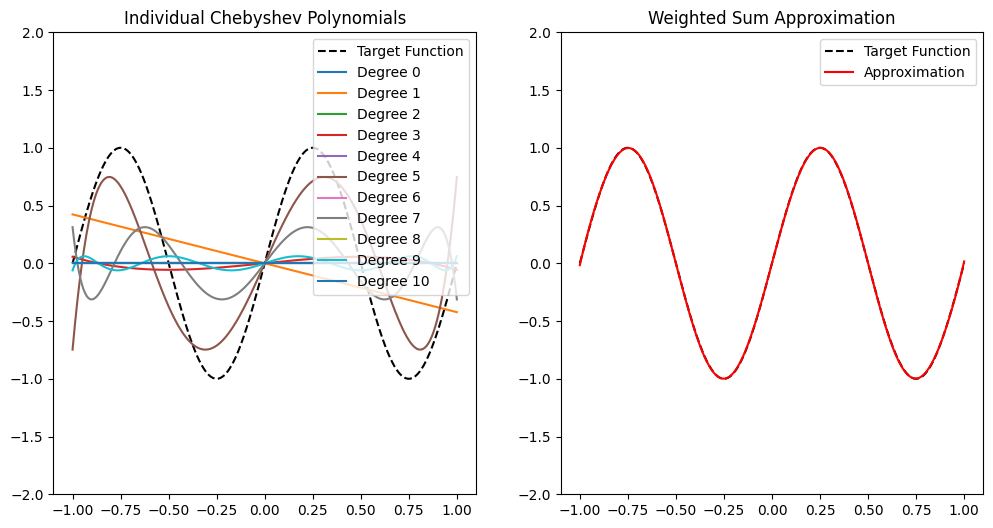

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize
from numpy.polynomial.chebyshev import Chebyshev

degrees = 10
target_function = lambda x: np.sin(2 * np.pi * x)
x_vals = np.linspace(-1, 1, 500)

chebyshev_polynomials = [Chebyshev.basis(d) for d in range(degrees + 1)]
y_target = target_function(x_vals)

weights = np.ones(degrees + 1)
def weighted_sum(weights, x):
    return sum(w * cheb(x) for w, cheb in zip(weights, chebyshev_polynomials))

def objective(weights):
    y_approx = weighted_sum(weights, x_vals)
    return np.sum((y_target - y_approx) ** 2)

result = minimize(objective, weights)
optimal_weights = result.x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Individual Chebyshev Polynomials")
ax2.set_title("Weighted Sum Approximation")

ax1.plot(x_vals, y_target, 'k--', label='Target Function')
ax2.plot(x_vals, y_target, 'k--', label='Target Function')

lines_cheb = [ax1.plot(x_vals, np.zeros_like(x_vals), label=f"Degree {i}")[0] for i in range(degrees + 1)]
line_approx, = ax2.plot(x_vals, np.zeros_like(x_vals), 'r-', label='Approximation')

ax1.set_ylim(-2, 2)
ax2.set_ylim(-2, 2)
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

def update(degree):
    for i, line in enumerate(lines_cheb[:degree + 1]):
        line.set_ydata(optimal_weights[i] * chebyshev_polynomials[i](x_vals))

    y_approx = sum(optimal_weights[i] * chebyshev_polynomials[i](x_vals) for i in range(degree + 1))
    line_approx.set_ydata(y_approx)

    return lines_cheb + [line_approx]

ani = FuncAnimation(fig, update, frames=degrees + 1, interval=500, blit=True)

ani.save("chebyshev_approximation.gif", writer='imagemagick', fps=1)

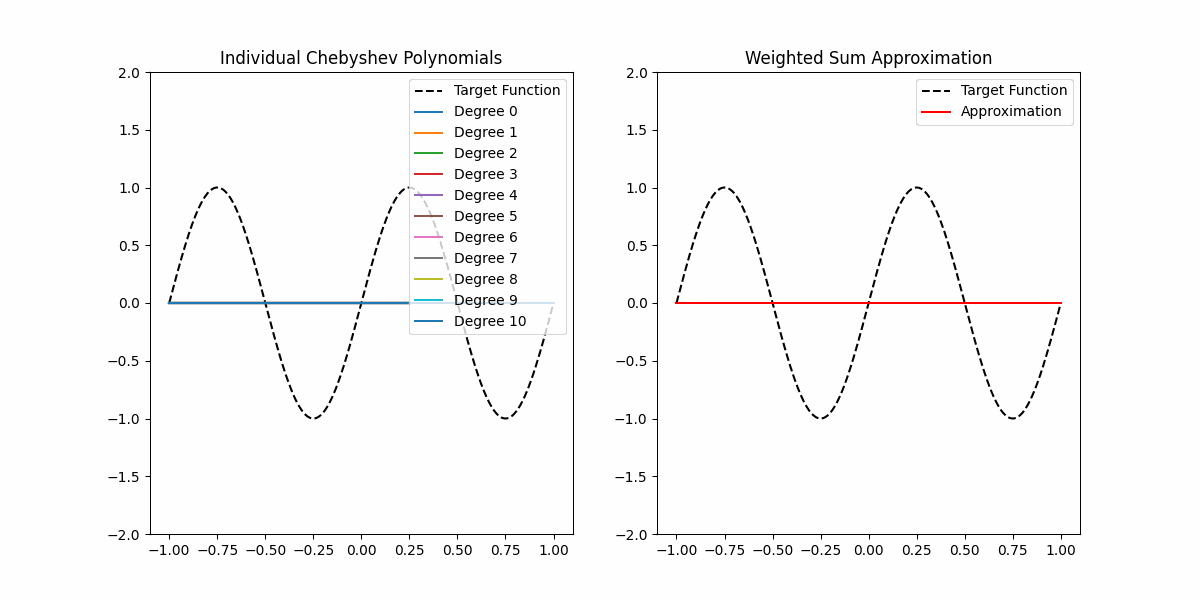

In [11]:
from IPython.display import Image

Image(filename="chebyshev_approximation.gif")